# Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sea
import random
import scipy.stats as stats
import xgboost
from collections import defaultdict
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score, classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import SCORERS
from pandas.plotting import (scatter_matrix,bootstrap_plot)
import warnings; warnings.simplefilter('ignore')

data = pd.read_csv('movies_metadata.csv')
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# Data cleaning

In [2]:
print('Adult:' ,data['adult'][0]) 

Adult: False


In [3]:
print('Collection: ' ,data['belongs_to_collection'][0])

Collection:  {'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg', 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}


In [4]:
print('Budget:' ,data['budget'][0])

Budget: 30000000


In [5]:
print('Genre: ' ,data['genres'][0])

Genre:  [{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]


In [6]:
print('Homepage: ' ,data['homepage'][0])

Homepage:  http://toystory.disney.com/toy-story


In [7]:
print('ID: ' ,data['id'][0])

ID:  862


In [8]:
print('IMDBID: ' ,data['imdb_id'][0])

IMDBID:  tt0114709


In [9]:
print('Language: ' ,data['original_language'][0])

Language:  en


In [10]:
print('OTitle: ' ,data['original_title'][0])

OTitle:  Toy Story


In [11]:
print('Overview: ' ,data['overview'][0])

Overview:  Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.


In [12]:
print('Poster: ' ,data['poster_path'][0])

Poster:  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg


In [13]:
print('Release: ' ,data['release_date'][0])

Release:  1995-10-30


In [14]:
print('Revenue: ' ,data['revenue'][0])

Revenue:  373554033.0


In [15]:
print('Time: ' ,data['runtime'][0])

Time:  81.0


In [16]:
print('Speak: ' ,data['spoken_languages'][0])

Speak:  [{'iso_639_1': 'en', 'name': 'English'}]


In [17]:
print('Status: ' ,data['status'][0])

Status:  Released


In [18]:
print('Tag: ' ,data['tagline'][0])

Tag:  nan


In [19]:
print('Title: ' ,data['title'][0])

Title:  Toy Story


In [20]:
print('Video: ' ,data['video'][0])

Video:  False


In [21]:
print('Vote score: ' ,data['vote_average'][0])

Vote score:  7.7


In [22]:
print('Vote number: ' ,data['vote_count'][0])

Vote number:  5415.0


In [23]:
data.drop(['belongs_to_collection', 'homepage', 'original_title', 'overview', 'tagline', 'status', 'video'],axis=1,inplace=True)
print(data.shape)

(45466, 17)


In [24]:
data.isna().sum().sort_values(ascending=False)

poster_path             386
runtime                 263
release_date             87
imdb_id                  17
original_language        11
vote_count                6
title                     6
spoken_languages          6
revenue                   6
vote_average              6
popularity                5
production_companies      3
production_countries      3
id                        0
genres                    0
budget                    0
adult                     0
dtype: int64

In [25]:
data.dropna(inplace=True)
data.shape

(44787, 17)

In [26]:
data.isna().sum().sort_values(ascending=False)

vote_count              0
poster_path             0
budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
popularity              0
production_companies    0
vote_average            0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
title                   0
adult                   0
dtype: int64

In [27]:
data['budget'] = data['budget'].astype(np.float)
data['popularity'] = data['popularity'].astype(np.float)

In [28]:
data = data[~(data == 0).any(axis=1)]

In [29]:
print(data.shape)

(5362, 17)


In [30]:
data = data[~(data == 0.0).any(axis=1)]

In [31]:
data['popularity'] = data['popularity'].fillna(0.0).astype(np.float)
data['runtime'] = data['runtime'].fillna(0.0).astype(np.float)
data['title'] = data['title'].fillna('NaN').astype('category')
data['vote_average'] = data['vote_average'].fillna(0.0).astype(np.float)
data['vote_count'] = data['vote_count'].fillna(0.0).astype(np.float)
data['budget'] = data['budget'].fillna(0.0).astype(np.float)
data['revenue'] = data['revenue'].fillna(0.0).astype(np.float)

data['poster_path'].fillna(0, inplace=True)
data.loc[data['poster_path'] != 0, 'poster_path'] = 1

In [32]:
print(data.shape)
data.head()

(5362, 17)


,adult,budget,genres,id,imdb_id,original_language,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,False,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,1,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0
1,False,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,1,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0
3,False,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,1,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0
5,False,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,17.924927,1,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Heat,7.7,1886.0
8,False,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,en,5.231580,1,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Sudden Death,5.5,174.0


In [33]:
data['genres'] = data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
data['production_companies'] = data['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
data['production_countries'] = data['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
data['spoken_languages'] = data['spoken_languages'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

data.head()

,adult,budget,genres,id,imdb_id,original_language,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,False,30000000.0,"[Animation, Comedy, Family]",862,tt0114709,en,21.946943,1,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,[English],Toy Story,7.7,5415.0
1,False,65000000.0,"[Adventure, Fantasy, Family]",8844,tt0113497,en,17.015539,1,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,"[English, Français]",Jumanji,6.9,2413.0
3,False,16000000.0,"[Comedy, Drama, Romance]",31357,tt0114885,en,3.859495,1,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,[English],Waiting to Exhale,6.1,34.0
5,False,60000000.0,"[Action, Crime, Drama, Thriller]",949,tt0113277,en,17.924927,1,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],1995-12-15,187436818.0,170.0,"[English, Español]",Heat,7.7,1886.0
8,False,35000000.0,"[Action, Adventure, Thriller]",9091,tt0114576,en,5.231580,1,"[Universal Pictures, Imperial Entertainment, S...",[United States of America],1995-12-22,64350171.0,106.0,[English],Sudden Death,5.5,174.0


In [34]:
data['genres'] = data['genres'].map(lambda x: str(x)[:-1])
data['genres'] = data['genres'].map(lambda x: str(x)[1:])

data['production_countries'] = data['production_countries'].map(lambda x: str(x)[:-1])
data['production_countries'] = data['production_countries'].map(lambda x: str(x)[1:])

data['spoken_languages'] = data['spoken_languages'].map(lambda x: str(x)[:-1])
data['spoken_languages'] = data['spoken_languages'].map(lambda x: str(x)[1:])

data['production_companies'] = data['production_companies'].map(lambda x: str(x)[:-1])
data['production_companies'] = data['production_companies'].map(lambda x: str(x)[1:])

data.head()

,adult,budget,genres,id,imdb_id,original_language,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,False,30000000.0,"'Animation', 'Comedy', 'Family'",862,tt0114709,en,21.946943,1,'Pixar Animation Studios','United States of America',1995-10-30,373554033.0,81.0,'English',Toy Story,7.7,5415.0
1,False,65000000.0,"'Adventure', 'Fantasy', 'Family'",8844,tt0113497,en,17.015539,1,"'TriStar Pictures', 'Teitler Film', 'Interscop...",'United States of America',1995-12-15,262797249.0,104.0,"'English', 'Français'",Jumanji,6.9,2413.0
3,False,16000000.0,"'Comedy', 'Drama', 'Romance'",31357,tt0114885,en,3.859495,1,'Twentieth Century Fox Film Corporation','United States of America',1995-12-22,81452156.0,127.0,'English',Waiting to Exhale,6.1,34.0
5,False,60000000.0,"'Action', 'Crime', 'Drama', 'Thriller'",949,tt0113277,en,17.924927,1,"'Regency Enterprises', 'Forward Pass', 'Warner...",'United States of America',1995-12-15,187436818.0,170.0,"'English', 'Español'",Heat,7.7,1886.0
8,False,35000000.0,"'Action', 'Adventure', 'Thriller'",9091,tt0114576,en,5.231580,1,"'Universal Pictures', 'Imperial Entertainment'...",'United States of America',1995-12-22,64350171.0,106.0,'English',Sudden Death,5.5,174.0


# Data process for analyzing

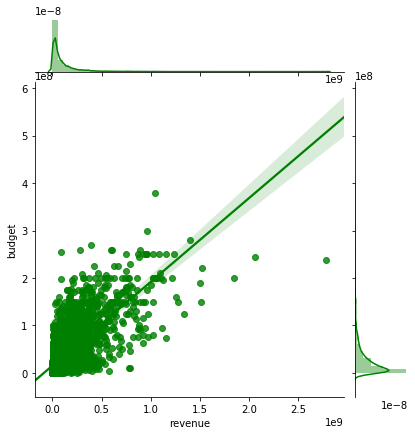

In [35]:
sea.jointplot('revenue', 'budget', data=data, kind="reg", color='g')

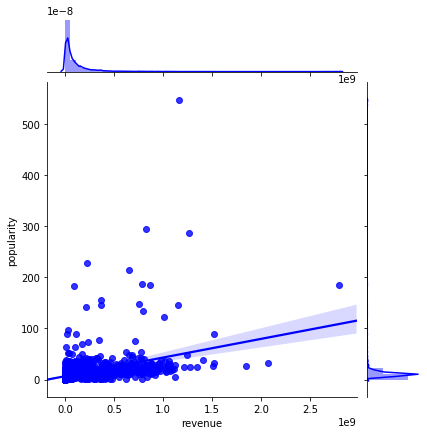

In [36]:
sea.jointplot('revenue', 'popularity', data=data, kind="reg", color='b')

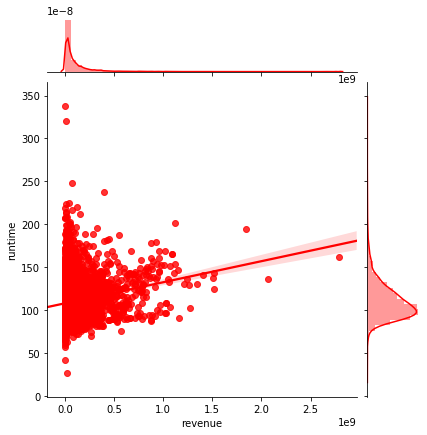

In [37]:
sea.jointplot('revenue', 'runtime', data=data, kind="reg", color='r')

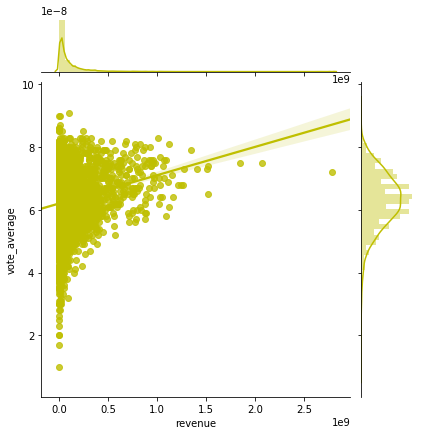

In [38]:
sea.jointplot('revenue', 'vote_average', data=data, kind="reg", color='y')

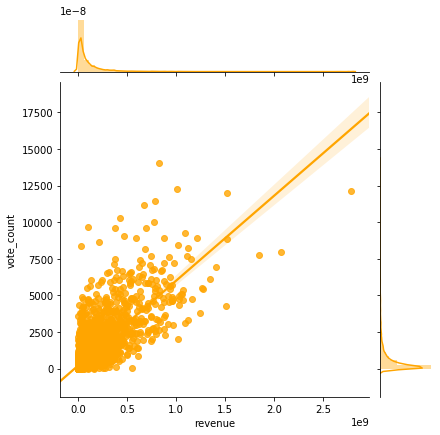

In [39]:
sea.jointplot('revenue', 'vote_count', data=data, kind="reg", color='orange')

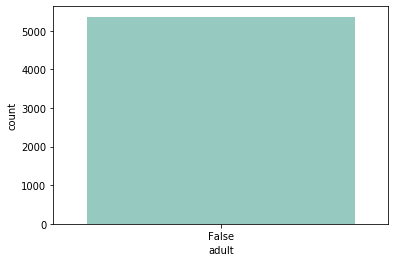

In [40]:
sea.countplot(x='adult', data=data, palette="Set3")

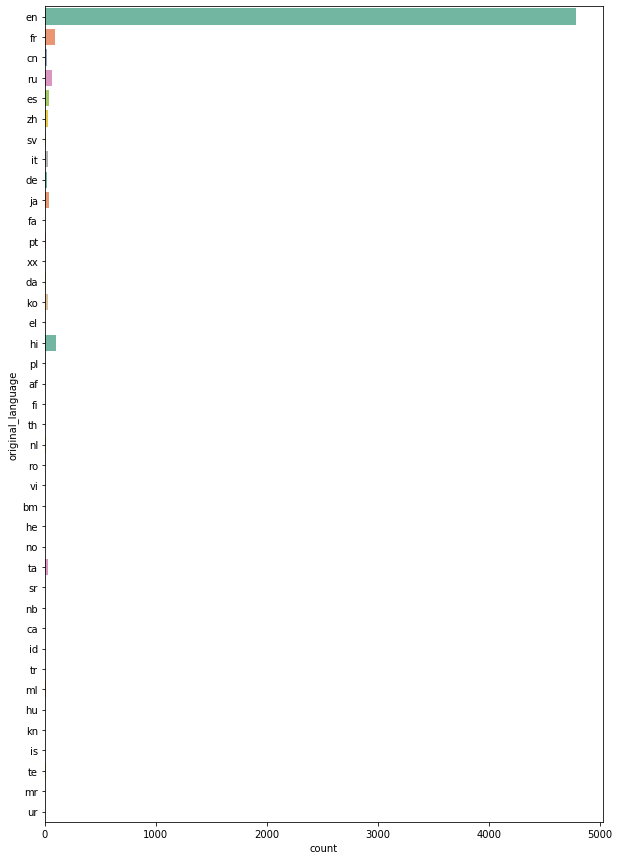

In [41]:
plt.figure(figsize=(10,15))
sea.countplot(y='original_language', data=data, palette="Set2")

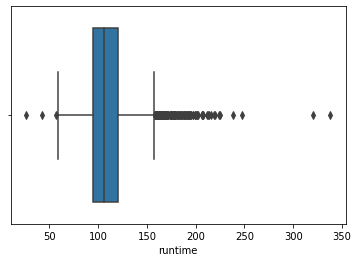

In [42]:
sea.boxplot(x=data['runtime'])

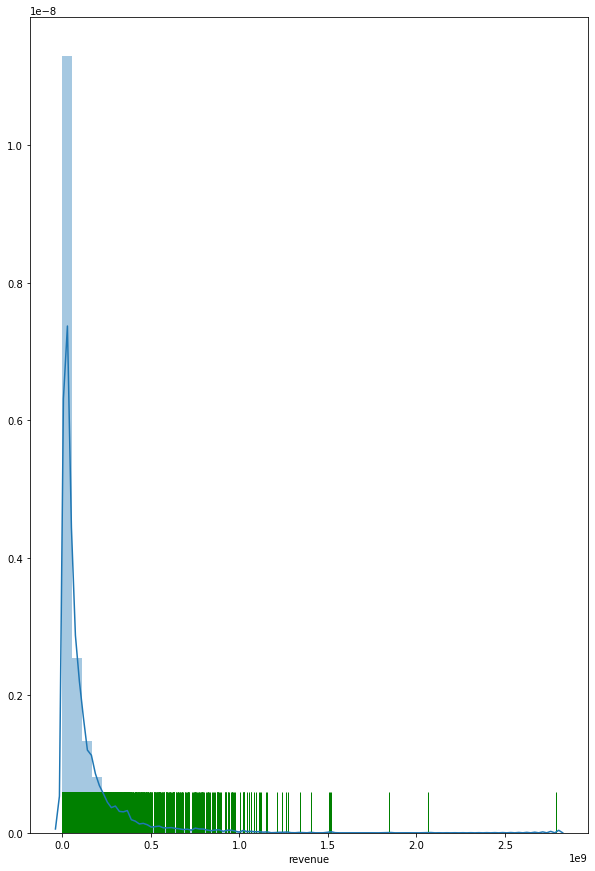

In [43]:
plt.figure(figsize=(10,15))
sea.distplot(data['revenue'], vertical=False, rug=True, rug_kws={"color": "g"})

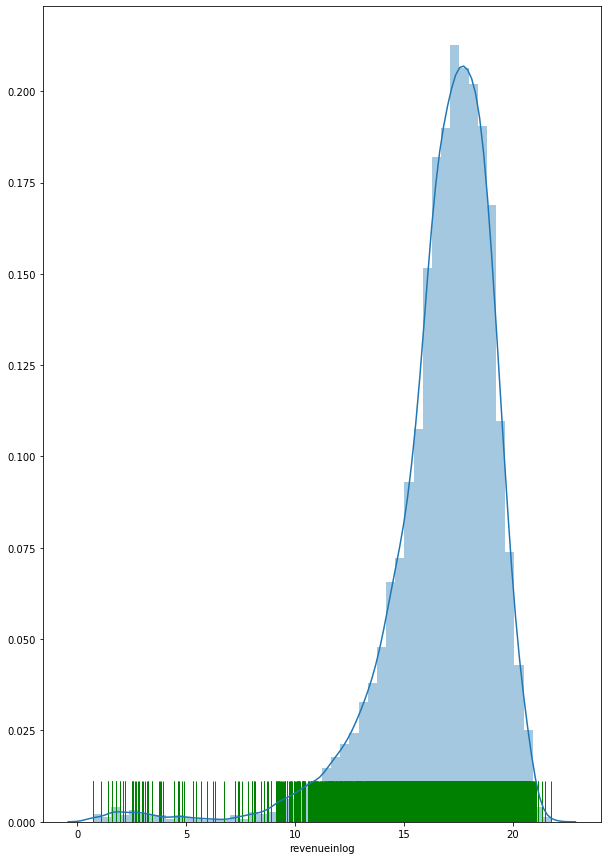

In [44]:
data['revenueinlog'] = np.log1p(data['revenue'])
plt.figure(figsize=(10,15))
sea.distplot(data['revenueinlog'], vertical=False, rug=True, rug_kws={"color": "g"})

In [45]:
data['genres']

0                          'Animation', 'Comedy', 'Family'
1                         'Adventure', 'Fantasy', 'Family'
3                             'Comedy', 'Drama', 'Romance'
5                   'Action', 'Crime', 'Drama', 'Thriller'
8                        'Action', 'Adventure', 'Thriller'
9                        'Adventure', 'Action', 'Thriller'
10                            'Comedy', 'Drama', 'Romance'
13                                      'History', 'Drama'
14                                   'Action', 'Adventure'
15                                        'Drama', 'Crime'
16                                      'Drama', 'Romance'
17                                       'Crime', 'Comedy'
18                          'Crime', 'Comedy', 'Adventure'
19                             'Action', 'Comedy', 'Crime'
20                           'Comedy', 'Thriller', 'Crime'
22              'Action', 'Adventure', 'Crime', 'Thriller'
24                                      'Drama', 'Romanc

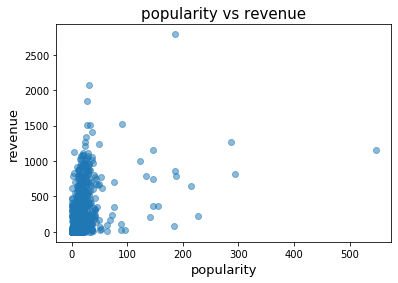

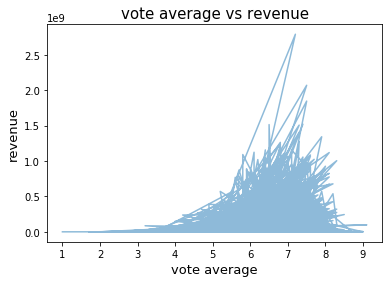

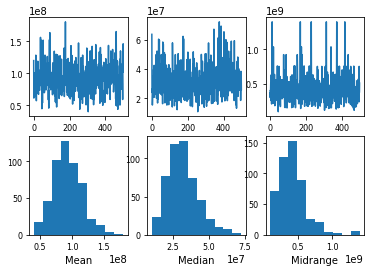

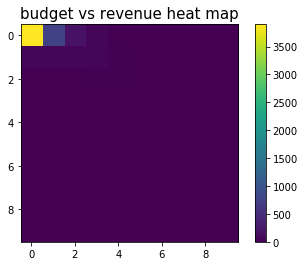

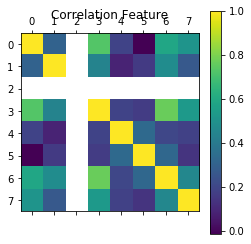

In [46]:
plt.title("popularity vs revenue", fontsize = 15)
plt.xlabel("popularity",  fontsize = 13)
plt.ylabel("revenue",  fontsize = 13)
plt.scatter(data['popularity'], data['revenue']/1000000, alpha = 0.5)
plt.show()

plt.title("vote average vs revenue", fontsize = 15)
plt.xlabel("vote average",  fontsize = 13)
plt.ylabel("revenue",  fontsize = 13)
plt.plot(data['vote_average'], data['revenue'], alpha = 0.5)
plt.show()

bootstrap_plot(data['revenue'], samples=500)
plt.show()

#heat map
plt.title("budget vs revenue heat map", fontsize = 15)
H, xedges, yedges = np.histogram2d(data['revenue'], data['budget'])
c = plt.imshow(H)
plt.colorbar(c)

corr = data.corr(method = 'pearson')
c = plt.matshow(corr)
plt.title("Correlation Feature")
plt.colorbar(c)
plt.show()

In [47]:
genres= data.genres.str.get_dummies(sep=',')
data =pd.concat([data,genres],axis=1)
data.drop(['genres'],axis=1,inplace=True)

country = data.production_countries.str.get_dummies(sep=',')
data =pd.concat([data,country],axis=1)
data.drop(['production_countries'],axis=1,inplace=True)

company = data.production_companies.str.get_dummies(sep=',')
data =pd.concat([data,company],axis=1)
data.drop(['production_companies'],axis=1,inplace=True)

language = pd.get_dummies(data['original_language'])
data = pd.concat([data, language], axis=1)      
data.drop(['original_language'], inplace=True, axis=1)

data.head()

,adult,budget,id,imdb_id,popularity,poster_path,release_date,revenue,runtime,spoken_languages,...,sr,sv,ta,te,th,tr,ur,vi,xx,zh
0,False,30000000.0,862,tt0114709,21.946943,1,1995-10-30,373554033.0,81.0,'English',...,0,0,0,0,0,0,0,0,0,0
1,False,65000000.0,8844,tt0113497,17.015539,1,1995-12-15,262797249.0,104.0,"'English', 'Français'",...,0,0,0,0,0,0,0,0,0,0
3,False,16000000.0,31357,tt0114885,3.859495,1,1995-12-22,81452156.0,127.0,'English',...,0,0,0,0,0,0,0,0,0,0
5,False,60000000.0,949,tt0113277,17.924927,1,1995-12-15,187436818.0,170.0,"'English', 'Español'",...,0,0,0,0,0,0,0,0,0,0
8,False,35000000.0,9091,tt0114576,5.231580,1,1995-12-22,64350171.0,106.0,'English',...,0,0,0,0,0,0,0,0,0,0
